In [1]:
%load_ext autoreload
%autoreload 2
%cd "python/LatentEvolution"
%ls

/home/hew/python/LatentEvolution
cache/  data/  framework/  main.py  script/  temp/


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from framework.data.Protein import Protein
from framework.data.ProteinDataset import ProteinDataset

In [54]:
ACE2_dataset = pd.read_csv('./data/ACE2_variants/raw/ACE2_variants.csv')
ACE2_dataset

,PDB,Chain,Start_index,WT_seq,MT_seq,ddG,R_label,solubility,new_ddG_mean,new_ddG_std
0,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,0.682895,1,0.764,0.487536,0.173732
1,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIELQAKDFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,2.013980,0,0.701,1.671400,0.154878
2,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,3.993790,0,0.769,6.211590,0.087345
3,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,0.951420,0,0.807,9.822730,2.028930
4,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKPFLDKFNHEAEDLFYQHSLASWNYNTNITEENVQNMNN...,3.109320,0,0.752,3.106590,0.163249
...,...,...,...,...,...,...,...,...,...,...
249995,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKTFLDKFNHEAEDLFYQDSLASWNYNTNITEENVQNMNN...,2.328450,0,0.781,2.569060,0.042348
249996,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMFN...,2.388160,0,0.764,3.736110,0.500392
249997,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,STIEEQAKTFLDKFNHEAEDLDYQSSLASWNYNTNITEENVQNMNN...,0.883968,1,0.781,1.555830,0.024263
249998,template2.pdb,A,19,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,YTIEEQAKTFLDKFNHEAEDMFYVSSLASWNYNTNITEENVQNMNN...,5.232150,0,0.824,5.724200,0.292841


In [55]:
wt_solubility = 0.764
ACE2_dataset['solubility'] = ACE2_dataset['solubility'] - wt_solubility
wild_type = set(ACE2_dataset['WT_seq'])
wild_type

{'STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNNAGDKWSAFLKEQSTLAQMYPLQEIQNLTVKLQLQALQ'}

In [56]:
wild_type = 'STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNNAGDKWSAFLKEQSTLAQMYPLQEIQNLTVKLQLQALQ'
ACE2_dataset = ACE2_dataset[['MT_seq', 'new_ddG_mean', 'solubility']]
ACE2_dataset.rename(columns={'MT_seq': 'variant', 'new_ddG_mean': 'ddG', 'solubility': 'dS'}, inplace=True)
ACE2_dataset['ddG'] = ACE2_dataset['ddG'].apply(lambda x: round(x, 4))
ACE2_dataset['dS'] = ACE2_dataset['dS'].apply(lambda x: round(x, 4))
ACE2_dataset

/tmp/ipykernel_371076/3593137421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACE2_dataset.rename(columns={'MT_seq': 'variant', 'new_ddG_mean': 'ddG', 'solubility': 'dS'}, inplace=True)
/tmp/ipykernel_371076/3593137421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACE2_dataset['ddG'] = ACE2_dataset['ddG'].apply(lambda x: round(x, 4))
/tmp/ipykernel_371076/3593137421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,variant,ddG,dS
0,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,0.4875,0.000
1,STIELQAKDFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,1.6714,-0.063
2,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,6.2116,0.005
3,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,9.8227,0.043
4,STIEEQAKPFLDKFNHEAEDLFYQHSLASWNYNTNITEENVQNMNN...,3.1066,-0.012
...,...,...,...
249995,STIEEQAKTFLDKFNHEAEDLFYQDSLASWNYNTNITEENVQNMNN...,2.5691,0.017
249996,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMFN...,3.7361,0.000
249997,STIEEQAKTFLDKFNHEAEDLDYQSSLASWNYNTNITEENVQNMNN...,1.5558,0.017
249998,YTIEEQAKTFLDKFNHEAEDMFYVSSLASWNYNTNITEENVQNMNN...,5.7242,0.060


In [57]:
# ACE2_dataset = ACE2_dataset[(ACE2_dataset['ddG'] < 5.0) & (ACE2_dataset['dS'] > -0.15)].reset_index(drop=True) # 126K
# ACE2_dataset = ACE2_dataset[(ACE2_dataset['ddG'] < 3.0) & (ACE2_dataset['dS'] > -0.15)].reset_index(drop=True) # 80K
# ACE2_dataset = ACE2_dataset[(ACE2_dataset['ddG'] < 1.0) & (ACE2_dataset['dS'] > -0.10)].reset_index(drop=True)  # 36K
# ACE2_dataset = ACE2_dataset[(ACE2_dataset['ddG'] < 0.5) & (ACE2_dataset['dS'] > -0.1)].reset_index(drop=True)  # 26K
ACE2_dataset = ACE2_dataset[(ACE2_dataset['ddG'] < 0.0) & (ACE2_dataset['dS'] > 0.00)].reset_index(drop=True)  # 2K

ACE2_dataset

,variant,ddG,dS
0,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-1.0838,0.017
1,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-0.0154,0.017
2,QTIEEQAKFFLDKFNHEAEDLFYQSSYASWNYNTNITEENVQNMNN...,-0.1567,0.043
3,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVDNMNN...,-1.4434,0.017
4,STIEEQAKSFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-0.0920,0.017
...,...,...,...
2399,STIEEQAKTFLDKFNHEAEDLFYQWSLASWNYNTNITEENVQNMNN...,-0.9824,0.017
2400,STIEEQAKDFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-0.0800,0.017
2401,STIEEQAKTFLDKFNHEAEDLFYQQSLAEWNYNTNITEENVQNMNN...,-1.2536,0.017
2402,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMDN...,-1.1124,0.017


In [58]:
ACE2_dataset['ddG'].describe()

count    2404.000000
mean       -0.942364
std         0.833851
min        -5.549700
25%        -1.331500
50%        -0.712550
75%        -0.319575
max        -0.000700
Name: ddG, dtype: float64

In [59]:
ACE2_dataset['dS'].describe()

count    2404.000000
mean        0.018029
std         0.008340
min         0.005000
25%         0.017000
50%         0.017000
75%         0.017000
max         0.078000
Name: dS, dtype: float64

<Axes: xlabel='ddG', ylabel='dS'>

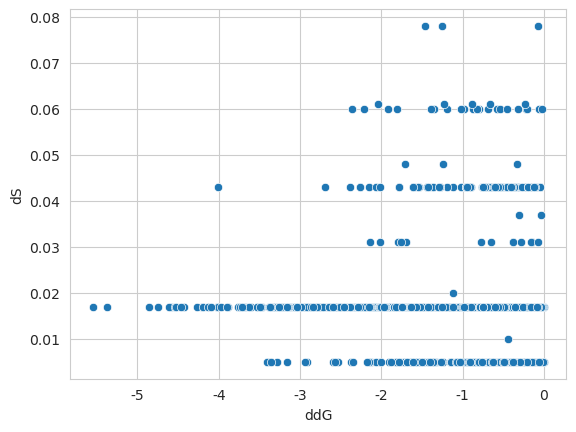

In [60]:
# 绘制2D散点图
sns.scatterplot(x='ddG', y='dS', data=ACE2_dataset)

<Axes: xlabel='ddG', ylabel='Count'>

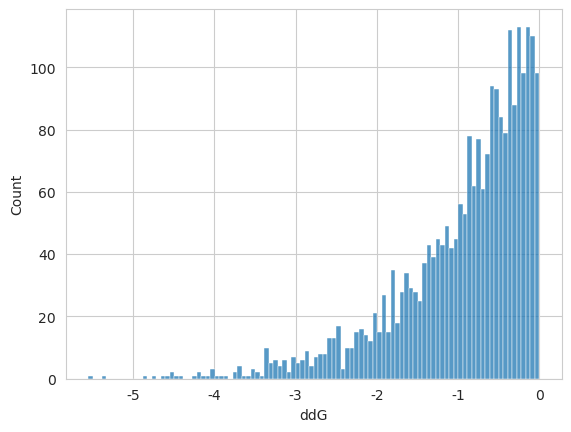

In [61]:
# 绘制ddG的分布直方图
sns.histplot(data=ACE2_dataset, x='ddG', bins=100)

<Axes: xlabel='dS', ylabel='Count'>

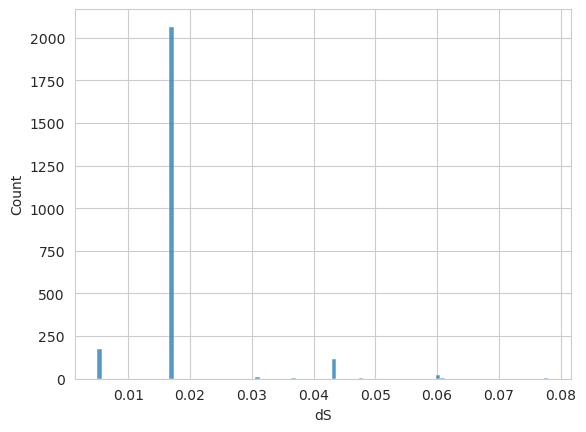

In [62]:
# 绘制dS的分布直方图
sns.histplot(data=ACE2_dataset, x='dS', bins=100)

CPU times: user 30.4 s, sys: 909 ms, total: 31.3 s
Wall time: 17.1 s


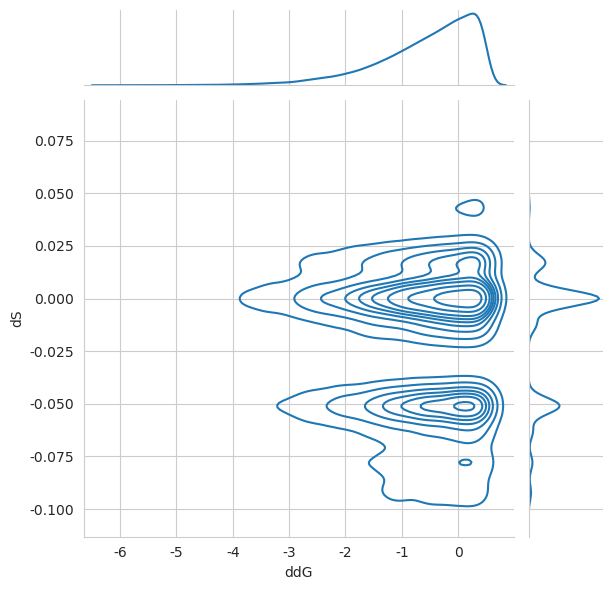

In [44]:
%%time
# 将2D散点图和ddG的分布直方图和dS的分布直方图放在一起
sns.jointplot(x='ddG', y='dS', data=ACE2_dataset, kind='kde')
# 保存图片
plt.savefig('./figure/dataset_attribute_landscape.png')

CPU times: user 6.14 s, sys: 343 ms, total: 6.48 s
Wall time: 1.55 s


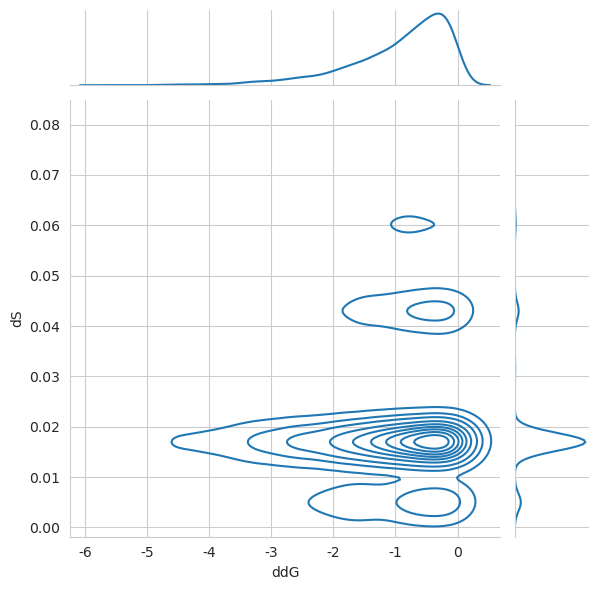

In [63]:
%%time
# 将2D散点图和ddG的分布直方图和dS的分布直方图放在一起
sns.jointplot(x='ddG', y='dS', data=ACE2_dataset, kind='kde')
# plt.savefig('./figure/dataset_attribute_landscape.png')

In [64]:
# ACE2_dataset = ACE2_dataset[:1000]
ACE2_dataset

,variant,ddG,dS
0,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-1.0838,0.017
1,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-0.0154,0.017
2,QTIEEQAKFFLDKFNHEAEDLFYQSSYASWNYNTNITEENVQNMNN...,-0.1567,0.043
3,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVDNMNN...,-1.4434,0.017
4,STIEEQAKSFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-0.0920,0.017
...,...,...,...
2399,STIEEQAKTFLDKFNHEAEDLFYQWSLASWNYNTNITEENVQNMNN...,-0.9824,0.017
2400,STIEEQAKDFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,-0.0800,0.017
2401,STIEEQAKTFLDKFNHEAEDLFYQQSLAEWNYNTNITEENVQNMNN...,-1.2536,0.017
2402,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMDN...,-1.1124,0.017


In [65]:
ACE2_data = []
for row in ACE2_dataset.itertuples():
    index = row.Index
    name = row.Index
    sequence = row.variant
    attributes = {
        'ddG': row.ddG,
        'dS': row.dS
    }
    protein = Protein(index, name, sequence=sequence, attributes=attributes)
    ACE2_data.append(protein)

ACE2_data

[Protein([ 0 ]		STIEEQAKTFLDKFNHEAED......MYPLEEIQNLTVKLQLQALQ		(ddG=-1.08, ...)),
 Protein([ 1 ]		STIEEQAKTFLDKFNHEAED......MYPLDEIQNLTVKLQLQALQ		(ddG=-0.02, ...)),
 Protein([ 2 ]		QTIEEQAKFFLDKFNHEAED......MYPLQEIQNVTVKLQLQALQ		(ddG=-0.16, ...)),
 Protein([ 3 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNYTMKLQLQALQ		(ddG=-1.44, ...)),
 Protein([ 4 ]		STIEEQAKSFLDKFNHEAED......MYPLEEIQNLTVKLQLQALQ		(ddG=-0.09, ...)),
 Protein([ 5 ]		SDIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLWALQ		(ddG=-2.82, ...)),
 Protein([ 6 ]		STIEEQAKFFLDKFNHEAED......MYPLQEIQNTTVKLQLQALQ		(ddG=-0.90, ...)),
 Protein([ 7 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNMTVKLQLQALQ		(ddG=-1.60, ...)),
 Protein([ 8 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLRLQALQ		(ddG=-0.15, ...)),
 Protein([ 9 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLQALQ		(ddG=-1.49, ...)),
 Protein([ 10 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLWALQ		(ddG=-0.90, ...)),
 Protein([ 11 ]		DDIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLQALQ		(ddG=-1.30, ...)),
 P

In [ ]:
# ACE2_dataset = ProteinDataset('ACE2_variants')
# ACE2_dataset.construct(ACE2_data)
# ACE2_dataset

In [47]:
ACE2_dataset = ProteinDataset('ACE2_variants_26k')
ACE2_dataset.construct(ACE2_data)
ACE2_dataset

ACE2_variants_26k(26488), location: /home/hew/python/LatentEvolution/data/ACE2_variants_26k

In [48]:
ACE2_dataset.data

{'0': Protein([ 0 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIKNLTVKLVLQALQ		(ddG=0.49, ...)),
 '1': Protein([ 1 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLQALQ		(ddG=-0.88, ...)),
 '2': Protein([ 2 ]		STIEEQAKTFLDKFNHEAED......MYPLEEIQNLTVKLQLQALQ		(ddG=-1.08, ...)),
 '3': Protein([ 3 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLRVKLQLQALA		(ddG=-0.25, ...)),
 '4': Protein([ 4 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLQALQ		(ddG=-0.72, ...)),
 '5': Protein([ 5 ]		STIEEQAKTFLDKFNHEAED......MYPLHEIQNLTVKLQLQALQ		(ddG=-0.54, ...)),
 '6': Protein([ 6 ]		SFIEEQAKTFLDKFNHEAED......KYPLQEIQNLTVKLQLQALQ		(ddG=0.48, ...)),
 '7': Protein([ 7 ]		STIEEQAKTFLDKFNHEAED......MYPLDEIQNLTVKLQLQALQ		(ddG=-0.02, ...)),
 '8': Protein([ 8 ]		STIEEQAKTFLDKFNHEAED......MYPLQEIQNLTQKLQLQALQ		(ddG=0.34, ...)),
 '9': Protein([ 9 ]		YTIEEQAKTFLDKFNHEAED......MYPLQEIQNLTVKLQLQALQ		(ddG=0.36, ...)),
 '10': Protein([ 10 ]		QTIEEQAKFFLDKFNHEAED......MYPLQEIQNVTVKLQLQALQ		(ddG=-0.16, ...)),
 '11': Protein([ 11 ]		STIEEQAKSFL

In [49]:
ACE2_dataset.show()

,index,name,partition,length,sequence,structure,graph,ddG,dS
0,0,0,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.4875,0.000
1,1,1,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLAFWNYNTNITEENVQNMNN...,None,None,-0.8772,0.000
2,10,10,None,83,QTIEEQAKFFLDKFNHEAEDLFYQSSYASWNYNTNITEENVQNMNN...,None,None,-0.1567,0.043
3,100,100,None,83,STIEEQAKTFLDKFNHEAEDLFYNSSLASWNYNTNITEENVQWMNN...,None,None,-0.1883,0.000
4,1000,1000,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,-0.1671,0.000
...,...,...,...,...,...,...,...,...,...
26483,9995,9995,None,83,STIEEQAKTFMAKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,-0.8374,-0.051
26484,9996,9996,None,83,STIEEQAKTFLDFFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.0817,0.000
26485,9997,9997,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQWMNN...,None,None,-1.5218,0.000
26486,9998,9998,None,83,LTIEEQALTFLDKFNHEAEDLFYQSELASWNYNTNITEENVQNMNN...,None,None,0.4394,0.017


In [50]:
%%time
ACE2_dataset.save()

The path does not exist, makedir: /home/hew/python/LatentEvolution/data/ACE2_variants_26k/cooked: Success
[HDF5] save keys: ['index', 'name', 'partition', 'length', 'sequence', 'structure', 'graph_data', 'features', 'attributes']


  0%|          | 0/26488 [00:00<?, ?it/s]

CPU times: user 2min 44s, sys: 2min 14s, total: 4min 59s
Wall time: 5min 2s


In [51]:
%%time
# ACE2_dataset_load = ProteinDataset('ACE2_variants')
ACE2_dataset_load = ProteinDataset('ACE2_variants_26k')
ACE2_dataset_load.load()
ACE2_dataset_load.show()

  0%|          | 0/26488 [00:00<?, ?it/s]

CPU times: user 4.71 s, sys: 2.06 s, total: 6.76 s
Wall time: 7.52 s


,index,name,partition,length,sequence,structure,graph,dS,ddG
0,0,0,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.000,0.4875
1,1,1,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLAFWNYNTNITEENVQNMNN...,None,None,0.000,-0.8772
2,10,10,None,83,QTIEEQAKFFLDKFNHEAEDLFYQSSYASWNYNTNITEENVQNMNN...,None,None,0.043,-0.1567
3,100,100,None,83,STIEEQAKTFLDKFNHEAEDLFYNSSLASWNYNTNITEENVQWMNN...,None,None,0.000,-0.1883
4,1000,1000,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.000,-0.1671
...,...,...,...,...,...,...,...,...,...
26483,9995,9995,None,83,STIEEQAKTFMAKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,-0.051,-0.8374
26484,9996,9996,None,83,STIEEQAKTFLDFFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.000,0.0817
26485,9997,9997,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQWMNN...,None,None,0.000,-1.5218
26486,9998,9998,None,83,LTIEEQALTFLDKFNHEAEDLFYQSELASWNYNTNITEENVQNMNN...,None,None,0.017,0.4394


In [66]:
ACE2_variants_1000 = ProteinDataset('ACE2_variants_2k')
ACE2_variants_1000.construct(ACE2_data)
ACE2_variants_1000.save()

The path does not exist, makedir: /home/hew/python/LatentEvolution/data/ACE2_variants_2k/cooked: Success
[HDF5] save keys: ['index', 'name', 'partition', 'length', 'sequence', 'structure', 'graph_data', 'features', 'attributes']


  0%|          | 0/2404 [00:00<?, ?it/s]

In [67]:
ACE2_dataset_load = ProteinDataset('ACE2_variants_2k')
ACE2_dataset_load.load()
ACE2_dataset_load.show()

  0%|          | 0/2404 [00:00<?, ?it/s]

,index,name,partition,length,sequence,structure,graph,dS,ddG
0,0,0,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.017,-1.0838
1,1,1,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.017,-0.0154
2,10,10,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.017,-0.8987
3,100,100,None,83,STIEEQAKTFLDKFNHDAEDLFYQSFLASWNYNTNITEENVQNMNN...,None,None,0.017,-1.1936
4,1000,1000,None,83,SDIEEQAKTFLDKFNHEAEDLFYQSSLAYWNYNTNITEENVQNMGN...,None,None,0.017,-2.5357
...,...,...,...,...,...,...,...,...,...
2399,995,995,None,83,STIEEQAKTFLDKFNHEAEDLFYQSDLARWNYNTNITEENVQNMNN...,None,None,0.017,-0.4275
2400,996,996,None,83,STIEEQAKTFLDKFNHEAEDLFYQSSLASWWYNTNITEENVQNMNN...,None,None,0.017,-1.6738
2401,997,997,None,83,STIEEQAKTFLDKFNHEAEDLFYQMSLASWNYNTNITEENVQNMNN...,None,None,0.017,-1.9267
2402,998,998,None,83,SDIEEQAKMFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQNMNN...,None,None,0.017,-1.3416
